<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 02  </font></center></h1>
<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    


# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 2 points
- PCA                  -> 2 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 9 points
</pre>

# 1. Regression 
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices. 

In [ ]:
import pandas as pd
data = pd.read_csv("Prices.csv")
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.2 point)**

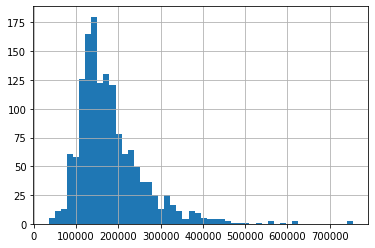

In [ ]:
minlength = min(data.SalePrice.values)
maxlength = max(data.SalePrice.values)
bins = int((maxlength - minlength) * 10) + 1

# shows the distribution of the data
data["SalePrice"].hist(bins = 50);

**<font color='red'>Answer:</font>** The data is definitely skewed. The values peak at around 150000 and the transition from 0 to 150000 seems to follow a normal distribution. However, the transition from 150000 to 500000 is much slower and seems to follow more of an exponential distribution.

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result. 
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section. 

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.05 point)**

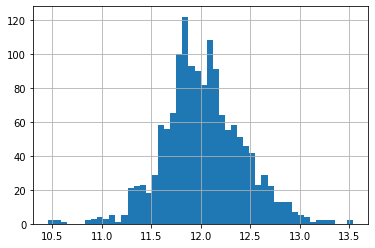

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --- preprocess this data ---

# check for and replace all NaN and infinite values with 0
data.isin([np.inf, -np.inf]).sum().sum()
data.replace([np.inf, -np.inf], 0, inplace=True)

# transform the skewed data (remember to reverse this with np.exp later, before analysis!)
#data["SalePrice"] = np.log(data["SalePrice"])
data.loc[:, ('SalePrice')] = np.log(data["SalePrice"])

# one-hot encoding
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
data = pd.get_dummies(X)
data["SalePrice"]=y

# save this data to a separate variable so we can retrieve it for regression
processedData = data.copy(deep=True)


# --- plot SalePrice again ---
minlength = min(data.SalePrice.values)
maxlength = max(data.SalePrice.values)
bins = int((maxlength - minlength) * 10) + 1

# shows the distribution of the data
data["SalePrice"].hist(bins = 50);

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.25 point)** 



In [ ]:
correlation = data.corr()
correlation[correlation['SalePrice'] >= 0]['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.817184
GrLivArea           0.700927
GarageCars          0.680625
GarageArea          0.650888
                      ...   
LotConfig_FR2       0.004883
BsmtFinSF2          0.004832
LotConfig_Corner    0.003985
SaleType_ConLI      0.003058
BsmtFinType2_GLQ    0.002345
Name: SalePrice, Length: 132, dtype: float64

<font color='red'> **Answer:**</font> top 3 features that have the highest correlation with price: OverallQual, GrLivArea, GarageCars. Correlation is positive. So when each of those 3 features change, the price changes considerably.

**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods to deal with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(1.50 points)**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# correlation[correlation['SalePrice'] >= 0.5]['SalePrice'].sort_values(ascending = False)

methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#Store the result in the following variables
MAE = []
RMSE = []
R2 = []


# We're selecting the top 10 values with the highest correlation to SalePrice to be the training features
# We're also selecting all three columns that contain NaN values (LotFrontage, MasVnrArea, GarageYrBlt), otherwise why use imputation
highest_correlation_feature_columns = ['SalePrice', 'OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' ]


# -------- MEAN IMPUTATION START --------

# load data
data = processedData.copy(deep=True)

# mean imputation
data.fillna(data.mean(), inplace=True)

# select highest correlation features
highest_correlation_features = data[highest_correlation_feature_columns]

# target variable
X_mean = highest_correlation_features.loc[:, highest_correlation_features.columns != 'SalePrice'] 

# variable to predict
y_mean = highest_correlation_features[['SalePrice']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.2, random_state=2)

mean_lin_reg_mod = LinearRegression()

mean_lin_reg_mod.fit(X_train, y_train)

pred = mean_lin_reg_mod.predict(X_test)

# MAE
test_set_mae = mean_absolute_error(y_test, pred)
MAE.append(test_set_mae)

# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
RMSE.append(test_set_rmse)

# R^2
test_set_r2 = r2_score(y_test, pred)
R2.append(test_set_r2)

# MSE
test_set_mse = (mean_squared_error(y_test, pred))

# -------- MEAN IMPUTATION END --------

# -------- MEDIAN IMPUTATION START --------

# load data
data = processedData.copy(deep=True)

# median imputation
data.fillna(data.median(), inplace=True)

# select highest correlation features
highest_correlation_features = data[highest_correlation_feature_columns]

# target variable
X_median = highest_correlation_features.loc[:, highest_correlation_features.columns != 'SalePrice'] 

# variable to predict
y_median = highest_correlation_features[['SalePrice']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_median, y_median, test_size = 0.2, random_state=2)

median_lin_reg_mod = LinearRegression()

median_lin_reg_mod.fit(X_train, y_train)

pred = median_lin_reg_mod.predict(X_test)

# MAE
test_set_mae = mean_absolute_error(y_test, pred)
MAE.append(test_set_mae)

# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
RMSE.append(test_set_rmse)

# R^2
test_set_r2 = r2_score(y_test, pred)
R2.append(test_set_r2)

# MSE
test_set_mse = (mean_squared_error(y_test, pred))

# -------- MEDIAN IMPUTATION END --------

# -------- MODE IMPUTATION START --------

# load data
data = processedData.copy(deep=True)

# mode imputation
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# select highest correlation features
highest_correlation_features = data[highest_correlation_feature_columns]

# target variable
X_mode = highest_correlation_features.loc[:, highest_correlation_features.columns != 'SalePrice'] 

# variable to predict
y_mode = highest_correlation_features[['SalePrice']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_mode, y_mode, test_size = 0.2, random_state=2)

mode_lin_reg_mod = LinearRegression()

mode_lin_reg_mod.fit(X_train, y_train)

pred = mode_lin_reg_mod.predict(X_test)

# MAE
test_set_mae = mean_absolute_error(y_test, pred)
MAE.append(test_set_mae)

# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
RMSE.append(test_set_rmse)

# R^2
test_set_r2 = r2_score(y_test, pred)
R2.append(test_set_r2)

# MSE
test_set_mse = (mean_squared_error(y_test, pred))

# -------- MODE IMPUTATION END --------


# -------- DROP IMPUTATION START --------

# load data
data = processedData.copy(deep=True)

# select highest correlation features
highest_correlation_features = data[highest_correlation_feature_columns]

# drop all NaN values (we're calling it drop imputation because it looks nice)
highest_correlation_features = highest_correlation_features.dropna()

# target variable
X_drop = highest_correlation_features.loc[:, highest_correlation_features.columns != 'SalePrice'] 

# variable to predict
y_drop = highest_correlation_features[['SalePrice']]

# split
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.2, random_state=2)

drop_lin_reg_mod = LinearRegression()

drop_lin_reg_mod.fit(X_train, y_train)

pred = drop_lin_reg_mod.predict(X_test)

# MAE
test_set_mae = mean_absolute_error(y_test, pred)
MAE.append(test_set_mae)

# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
RMSE.append(test_set_rmse)

# R^2
test_set_r2 = r2_score(y_test, pred)
R2.append(test_set_r2)

# MSE
test_set_mse = (mean_squared_error(y_test, pred))

# -------- DROP IMPUTATION END --------

#print the metrics
i = 0

for m in methods:
    print("Method: " + m + "  MAE: " + str(MAE[i]) + "  RMSE: " + str(RMSE[i]) + "  R2: " + str(R2[i]))
    i+=1
    


Method: mean imputation  MAE: 0.1154615661666249  RMSE: 0.1579491666641637  R2: 0.8517494201871889
Method: median imputation  MAE: 0.11541946430587964  RMSE: 0.15789297772974797  R2: 0.8518548789321119
Method: mode imputation  MAE: 0.11502769139890467  RMSE: 0.15722353021780278  R2: 0.8531084512973245
Method: dropping missing values  MAE: 0.11489422545036228  RMSE: 0.23352987764098662  R2: 0.6276727081576537


<font color='red'> **Answer:**</font> Mode imputation worked best. 

It's also notable that although dropping missing values had the lowest MAE, doing so significantly reduced R2 and increased the RMSE, meaning that the resulting model was still probably worse than the alternatives. This difference is most significant, because it is the only mode of imputation that affects features (columns) without any missing values (77% of features).

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [ ]:
mae_best = 0.11502769139890467
rmse_best = 0.15722353021780278	
r2_best = 0.8531084512973245
             

# 1.2 Principal Component Analysis (PCA) (2 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better). 
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (0.5point)**

In [ ]:
# from sklearn.decomposition import PCA

# X = #TODO
# y = #TODO
#TODO: initialize pca, pass, whiten=True, svd_solver='randomized', random_state=0

#TODO: fit pca

In [ ]:
data = processedData.copy(deep=True)

# Mode Imputation

for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
x = data.loc[:, data.columns != 'SalePrice'] 
y = data[['SalePrice']] 

In [ ]:
x.shape

(1460, 270)

In [ ]:
y.shape

(1460, 1)

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
X = x
y = y
X = X.to_numpy()

#whiten
pca = PCA(n_components=270,whiten=True,svd_solver='randomized',random_state=0)
pca = pca.fit(X)

#new features by PCA
dataPCA = pca.transform(X)

**1.2.2. What percentage of the variance is explained by the first five components? (0.10 point)**

In [ ]:
df_dataPCA = pd.DataFrame(dataPCA)
df_dataPCA_5 = df_dataPCA.head(5)
df_dataPCA_5

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,-0.206881,0.026013,-0.486965,1.388483,-0.335617,-0.833013,-0.349596,0.274482,0.088214,-0.917944,...,-0.000016,0.000053,-0.000085,0.000176,0.000079,0.000014,0.000298,0.000073,-0.000150,-0.000339
1,-0.091348,-0.014626,1.269713,0.425276,-0.094310,-0.347166,0.320896,-0.270839,-0.645449,1.718847,...,-0.000087,0.000293,0.000103,0.000255,-0.000024,0.000004,-0.000064,0.000193,-0.000325,-0.000249
2,0.073532,0.122712,-0.806402,0.778285,-0.254811,-0.782075,-0.461805,0.360703,-0.244185,-0.932036,...,0.000140,-0.000021,-0.000220,0.000397,0.000110,-0.000009,0.000007,0.000208,-0.000315,-0.000180
3,-0.097237,-0.076671,-0.992711,0.340622,-0.194366,0.041531,-0.606840,0.084406,-1.184512,-0.969936,...,0.000582,-0.000241,-0.001068,0.000695,0.000143,0.000114,0.001007,-0.000251,-0.000593,0.000099
4,0.376391,0.901920,-0.918456,1.018237,-0.275072,-0.826368,-1.354220,0.790226,0.037118,0.257021,...,0.000026,-0.000050,-0.000046,0.000013,0.000198,0.000294,0.000533,-0.000080,0.000308,-0.000126


In [ ]:
df_dataPCA_5[0][0] / sum(np.diagonal(df_dataPCA_5))

0.21497250996629552

<font color='red'> **Answer:**</font> 21.49%

It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation. 

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

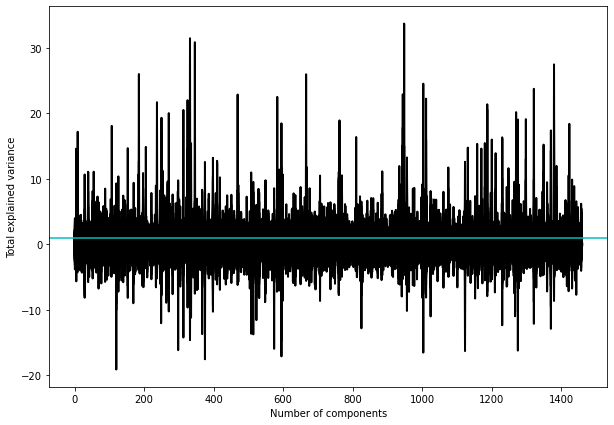

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
lw=2
plt.plot(dataPCA, color='k', lw=lw)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
    
#plt.xlim(0, 2000)
#plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()


<font color='red'> **Answer:**</font>

**1.2.5. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.20 points)**

In [ ]:
data = processedData.copy(deep=True)

# Mode Imputation

for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
x = data.loc[:, data.columns != 'SalePrice'] 
y = data[['SalePrice']] 

In [ ]:
x.shape

(1460, 270)

In [ ]:
y.shape

(1460, 1)

In [ ]:
from sklearn.decomposition import PCA

X = x
y = y
X = X.to_numpy()

#whiten
pca = PCA(n_components=37,whiten=True,svd_solver='randomized',random_state=0)
pca = pca.fit(X)

#new features by PCA
dataPCA = pca.transform(X)

**1.2.6. Use the new components derived from PCA to predict the house prices. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.60 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.5```*

In [ ]:
pca_X = pca.transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataPCA, y, train_size=0.80, test_size=0.20, random_state=0)

In [ ]:
# create the model
regressor = LinearRegression() 

# create the model
regressor.fit(X_train, y_train)

# make predictiion (test) ## X test???
y_predicted_pca = regressor.predict(X_test) 

# train data: make prediction (train)
y_predicted_pca_tr = regressor.predict(X_train)  ## X train ???

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# MAE
pca_mae = mean_absolute_error(y_test, y_predicted_pca)

#MSE
test_set_mse = (mean_squared_error(y_test, y_predicted_pca))

# RMSE
pca_rmse = (np.sqrt(mean_squared_error(y_test, y_predicted_pca)))

#R^2
pca_r2 = r2_score(y_test, y_predicted_pca)

print("mean absolute error is: ", pca_mae)
print("mean squared error is: ", test_set_mse)
print("root mean squared error is: ", pca_rmse)
print("rscore: ", pca_r2)

mean absolute error is:  0.11489422545036228
mean squared error is:  0.05453620375101418
root mean squared error is:  0.23352987764098662
rscore:  0.6276727081576537


**1.2.7 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.1 point)**

In [ ]:
print("MAE difference after PCA: ", pca_mae-mae_best)
print("RMSE difference after PCA: ", pca_rmse-rmse_best)
print("R2 difference after PCA: ", pca_r2-r2_best) 

MAE difference after PCA:  -0.00013346594854239668
RMSE difference after PCA:  0.07630634742318385
R2 difference after PCA:  -0.22543574313967074


<font color='red'> **Answer:**</font> The MAE is slightly better after PCA, but the RMSE has become significantly higher. This could mean that there are a lot of outliars in the data that the post-PCA model isn't accounting for.

The post-PCA R<sup>2</sup> is much lower, which indicates that the model's performance has worsened. 

In conclusion, I would say that post-PCA the model performs much worse. 

## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
<br>
Unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on 
- 1.3.1 Cross-validation 
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the Lecture 7.* <br><br>
    
- 1.3.2 Regularization 
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

In [ ]:
# Let's use the model trained on mode imputation, since that one had the best results
X_train, X_test, y_train, y_test = train_test_split(X_mode, y_mode, test_size = 0.2, random_state=2)

train_pred = mode_lin_reg_mod.predict(X_train)
test_pred = mode_lin_reg_mod.predict(X_test)

# R^2
train_set_r2 = r2_score(y_train, train_pred)
test_set_r2 = r2_score(y_test, test_pred)

print("Training R2 value: " + str(train_set_r2))
print("Testing R2 value: " + str(test_set_r2))


Training R2 value: 0.8148722026980968
Testing R2 value: 0.8531084512973245


<font color='red'> **Answer:**</font> The R<sup>2</sup> value is greater on the test data than on the training data. However, the difference between the two R<sup>2</sup> values is pretty small. As a result, we can conclude that the data probably does not have any serious overfitting problems, as that would have caused a significantly lower R<sup>2</sup> value on the testing data. However, there may still be some overfitting present in the model, as the training and test data sets aren't very large and the R<sup>2</sup> value can sometimes be misleading.

**1.3.1 Please apply K-fold=10 fold cross validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std

cv = KFold(n_splits = 11, shuffle = True, random_state = 1)

# create model
lm = LinearRegression()

# evaluate model using R^2, and MSE as evaluation metrics
scores = cross_validate(lm, X_train, y_train, scoring=['r2', 'neg_mean_squared_error'], cv=cv, return_train_score=True)

# report performance
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

R^2: 0.777 (0.159)
MSE: -0.033 (0.021)


**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

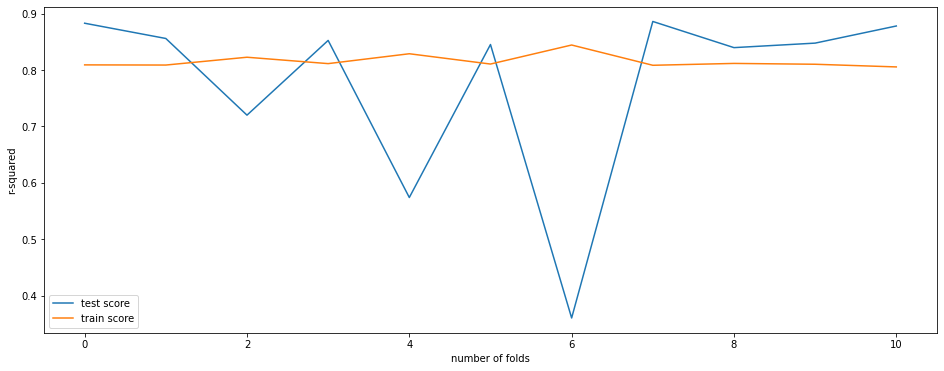

In [ ]:
import matplotlib.pyplot as plt # useful because of work order
plt.figure(figsize=(16,6))
# plot the trendlines
plt.plot(scores['test_r2'])
plt.plot(scores['train_r2'])
plt.xlabel('number of folds')
plt.ylabel('r-squared')
plt.legend(['test score', 'train score'], loc='lower left')

<font color='red'> **Answer:**</font> The result shows that on most folds, the R<sup>2</sup> value on the training data is very close to the R<sup>2</sup> value on the test data. However, on three folds (fold 2, 4 and 6) we can see some clear signs of overfitting, as the R<sup>2</sup> value on test data is much worse compared to the R<sup>2</sup> on training data, even dropping under 0.4 in one case. Based on this, we can assume that the model has some problems with overfitting.

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge


cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha 
alpha = [] 

# Split the data again, just in case the user is running cells out of order
X_train, X_test, y_train, y_test = train_test_split(X_mode, y_mode, test_size = 0.2, random_state=2)

# Loop to for different alpha value 
for i in range(1, 9): 
    # formulate the lasso model where alpha=i * 0.0001
    lassoModel = Lasso(alpha = i * 0.0001)

    # fit the lasso model on whole X, y
    lassoModel.fit(X_mode, y_mode)

    # perform 10 fold cross validation and store the result in score variable
    scores = cross_val_score(lassoModel, X_mode, y_mode, cv=10)
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_lasso.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
    
    


0.0001 : 80.1865483484265
0.0002 : 80.18630344708546
0.00030000000000000003 : 80.18729245158124
0.0004 : 80.18768625008887
0.0005 : 80.18685982218672
0.0006000000000000001 : 80.1866589677297
0.0007 : 80.1862413242924
0.0008 : 80.18609435830726


**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Lasso Regression Model 
from sklearn.model_selection import train_test_split
lassoModelBest = Lasso(alpha = 0.0004) # pass the best alpha value

# Split the data again, just in case
X_train, X_test, y_train, y_test = train_test_split(X_mode, y_mode, test_size = 0.2, random_state=2)

#TODO: Fit the model again 
lassoModelBest.fit(X_train, y_train)
  
# Evaluating the Lasso Regression model 
print(lassoModelBest.score(X_test, y_test)) 

0.8529956544260788


**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [ ]:
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 


# Split the data again, just in case the user is running cells out of order
X_train, X_test, y_train, y_test = train_test_split(X_mode, y_mode, test_size = 0.2, random_state=2)


# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the ridge model where alpha=i * 0.0001
    ridgeModel = Ridge(alpha = i * 0.0001)

    #TODO: fit the ridge model on whole X, y
    ridgeModel.fit(X_mode, y_mode) 

    #TODO: perform 10 fold cross validation and store the result in score variable
    scores = cross_val_score(ridgeModel, X_mode, y_mode, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
    
    


0.0001 : 80.18655508947133
0.0002 : 80.1865551888868
0.00030000000000000003 : 80.18655528830173
0.0004 : 80.18655538771615
0.0005 : 80.18655548713005
0.0006000000000000001 : 80.18655558654339
0.0007 : 80.18655568595625
0.0008 : 80.18655578536857


**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Ridge Regression Model 
from sklearn.model_selection import train_test_split
ridgeModelBest = Ridge(0.0003) # pass the best alpha value

#TODO: Fit the model again 
ridgeModelBest.fit(X_train, y_train) 
  
# Evaluating the ridge Regression model 
print(ridgeModelBest.score(X_test, y_test)) 

0.8531084475797762
